In [154]:
#OpenCV + Python script for inspecting (counting) pills during manunfacturing

import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [200]:
# Read an image
img = cv2.imread('14.jpg') 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


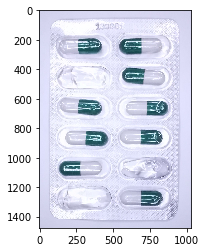

In [201]:
plt.imshow(img)

In [202]:
# Convert the image in a numpy array

img = np.array(img, dtype=np.uint8)

In [203]:
fx = fy = int(600.0 / img.shape[0])

In [204]:
dim = (100, int(img.shape[1] * fx))

In [205]:
# Resize the original image

resized = cv2.resize(img, dim, fx = 0.5,fy=0.5)

In [206]:
blur = cv2.GaussianBlur(resized,(7,7),0)

In [207]:
roi_hsv = cv2.cvtColor(blur, cv2.COLOR_RGB2HSV)

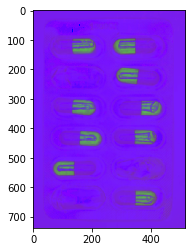

In [208]:
plt.imshow(roi_hsv)

In [209]:
# Convert the image in HSV 

h, s, v = cv2.split(roi_hsv)
hsv_image = cv2.merge([h, s, v])

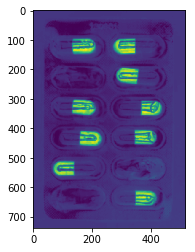

In [210]:
plt.imshow(s)

In [211]:
imgOTSU = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [212]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (19, 19),(9,9))

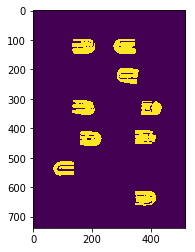

In [213]:
plt.imshow(imgOTSU[1])

In [214]:
fgmask = cv2.morphologyEx(imgOTSU[1], cv2.MORPH_CLOSE, kernel)

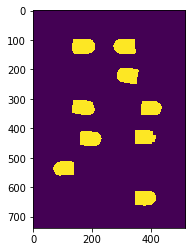

In [215]:
plt.imshow(fgmask)

In [216]:
_, PillsContours, hierarchy = cv2.findContours(fgmask.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)  


In [197]:
print ('Number of pills: ', len(PillsContours))

Number of pills:  9


In [198]:
NumPills = str(len(PillsContours))

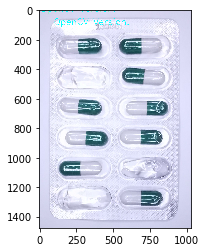

In [199]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()
